## Objective: Create a model to predict whether a borrower will pay the loan or not

### Business Benefit: Reduce NPA and increased profit due to loan disbural to only good                                                borrowers.

### Understanding the dataset
Here are what the data represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

** not.fully.paid: This is the output field. Please note that 1 means borrower is not going to pay the loan completely** 

## Importing the dataset

In [1]:
import pandas as pd
loan_default = pd.read_csv('C:/Users/rjaip/Documents/Datasets/loan_borowwer_data.csv')
loan_default.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### data information and checking missing values

In [2]:
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### summary of the dataset

In [6]:
loan_default.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<AxesSubplot:>

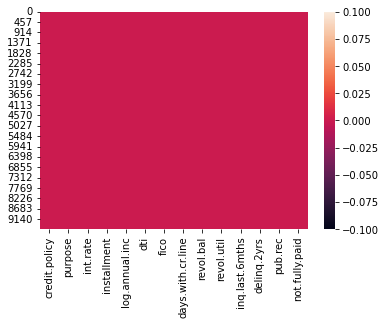

In [3]:
import seaborn as sns
sns.heatmap(loan_default.isnull())

## Exploratory Data Analysis

Text(0, 0.5, 'No. of customers')

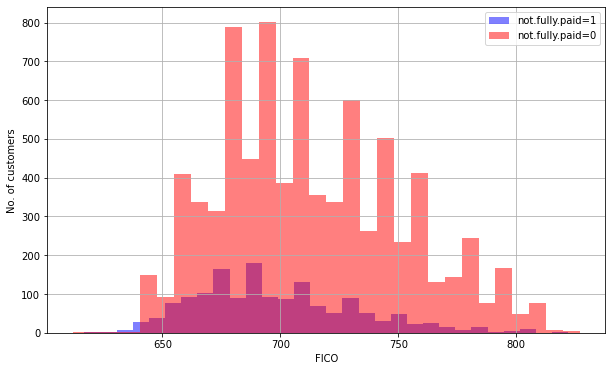

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
loan_default[loan_default['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loan_default[loan_default['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')
plt.ylabel('No. of customers')

Text(0, 0.5, 'No. of customers')

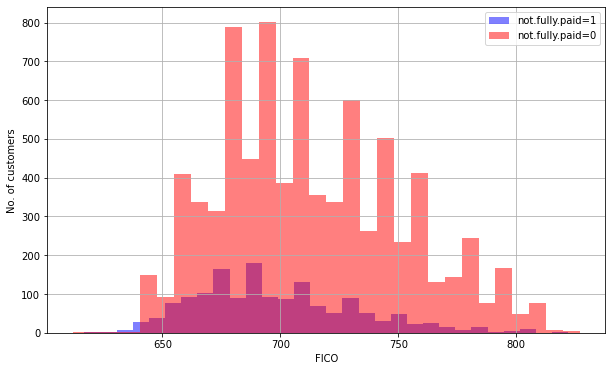

In [9]:
plt.figure(figsize=(10,6))
loan_default[loan_default['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loan_default[loan_default['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')
plt.ylabel('No. of customers')

### creating dummies for factor variables

In [11]:
features= ["purpose"]
for i in features:
    dummy= pd.get_dummies(loan_default[i], drop_first=True)
    loan_default= pd.concat([loan_default,dummy], axis=1)
    loan_default.drop(i, axis=1, inplace=True)

In [12]:
loan_default.rename(
    columns={"fico":"fico.score"},
    inplace=True)

In [13]:
loan_default.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico.score', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

In [14]:
loan_default = loan_default.astype({"credit.policy":'category'})

loan_default.info

<bound method DataFrame.info of      credit.policy  int.rate  installment  log.annual.inc    dti  fico.score  \
0                1    0.1189       829.10       11.350407  19.48         737   
1                1    0.1071       228.22       11.082143  14.29         707   
2                1    0.1357       366.86       10.373491  11.63         682   
3                1    0.1008       162.34       11.350407   8.10         712   
4                1    0.1426       102.92       11.299732  14.97         667   
...            ...       ...          ...             ...    ...         ...   
9573             0    0.1461       344.76       12.180755  10.39         672   
9574             0    0.1253       257.70       11.141862   0.21         722   
9575             0    0.1071        97.81       10.596635  13.09         687   
9576             0    0.1600       351.58       10.819778  19.18         692   
9577             0    0.1392       853.43       11.264464  16.28         732   

      d

### summary of the dataset after dummies

In [15]:
loan_default.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico.score,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [16]:
loan_default.tail()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico.score,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0
9577,0,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1,0,1,0,0,0,0


In [17]:
loan_default.corr(method ='pearson')

,int.rate,installment,log.annual.inc,dti,fico.score,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
int.rate,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico.score,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567
delinq.2yrs,0.156079,-0.004368,0.029203,-0.021792,-0.216340,0.081374,-0.033243,-0.042740,0.021245,1.000000,0.009184,0.008881,-0.008817,-0.000697,-0.002214,-0.013098,0.004085,-0.004148


### Describing independent variables

In [18]:
X= loan_default.drop('not.fully.paid', axis=1)
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico.score,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


In [19]:
y= loan_default['not.fully.paid']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

### Spliting the dataset in 80:20 ratio

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=4)

In [21]:
X_test.shape

(1916, 18)

In [22]:
X_train.shape

(7662, 18)

### Applying logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
model_LR= LogisticRegression() #creating a logistic regression model
model_LR.fit(X_train,y_train)
y_pred_LR= model_LR.predict(X_test)

C:\Users\rjaip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_LR)*100)

84.29018789144051


In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_LR))

[[1610    6]
 [ 295    5]]


### Applying Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
model_RF= RandomForestClassifier() #creating a random forest classifier model
model_RF.fit(X_train,y_train)
y_pred_RF= model_RF.predict(X_test)

print(accuracy_score(y_test, y_pred_RF)*100)
print(confusion_matrix(y_test, y_pred_RF))

84.34237995824635
[[1609    7]
 [ 293    7]]


### Applying XGBoost Classifier

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
model_XGB= GradientBoostingClassifier()
model_XGB.fit(X_train,y_train)
y_pred_XGB= model_XGB.predict(X_test)

print(accuracy_score(y_test, y_pred_XGB)*100)
print(confusion_matrix(y_test, y_pred_XGB))

84.29018789144051
[[1606   10]
 [ 291    9]]


### Running the above model on training data

In [33]:
y_pred_LRt= model_LR.predict(X_train) #logistic regression model run on training data
y_pred_RFt= model_RF.predict(X_train) #Random Forest Classification model run on training data
y_pred_XGBt= model_XGB.predict(X_train) #XGBoost Classification model run on training data

print(accuracy_score(y_train, y_pred_LRt)*100) 
print(accuracy_score(y_train, y_pred_RFt)*100)
print(accuracy_score(y_train, y_pred_XGBt)*100)

83.79013312451058
99.98694857739494
85.19968676585748
